# Цифровая обработка речевых сигналов

Целью работы является изучение методов спектрального анализа речевых сигналов.

In [1]:
import wave
import numpy as np
from scipy.fftpack import fft
%matplotlib inline
import matplotlib.pyplot as plt

### 1. Чтение сигнала из файла

Для выполнения лабораторной работы запишите речевой сигнал с микрофона в wave-файл. Для удобства дальнейшей работы установите следующие параметры записи:

1. Частота дискретизации 11025 Гц.
2. Режим записи - "моно".
3. Разрядность 16 бит.

Файл сигнала разместите в текущей папке Python. В произносимой фразе обязательно должны быть гласные звуки и шипящие согласные. В качестве тестовой можно использовать фразу "Саша кусал сало"


Создать объект для чтения wave-файла

In [2]:
wav = wave.open("Favorite_station_11.wav", mode="r")

Метод `getparams()` возвращает кортеж основных параметров файла:   
1. число каналов;  
1. число байт на сэмпл;  
1. число фреймов в секунду;  
1. общее число фреймов;  
1. тип сжатия;  
1. имя типа сжатия

In [3]:
(nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()

In [4]:
#wav.close()

Метод `readframes()` считывает указанное число фреймов относительно внутреннего указателя объекта и инкрементирует его

In [5]:
content = wav.readframes(nframes)

Посмотрим на считанные данные

In [6]:
content

b'\x0f\x00\x12\x00\x0e\x00\x0f\x00\t\x00\x11\x00\r\x00\x12\x00\x0f\x00\x10\x00\x0f\x00\x0e\x00\x16\x00\x1a\x00 \x00 \x00\x1f\x00\x1d\x00$\x00!\x00\x19\x00\x18\x00\x19\x00\x1d\x00\x1e\x00\x1c\x00\x1f\x00\x1d\x00\x18\x00\x19\x00!\x00\x1e\x00\x1a\x00#\x00\x1c\x00\x1f\x00!\x00$\x00,\x00$\x00.\x00/\x006\x005\x000\x005\x00/\x005\x00.\x00&\x00&\x00\'\x00\x1e\x00 \x00\x1c\x00\x17\x00\x16\x00\x0e\x00\x16\x00\r\x00\t\x00\x08\x00\x10\x00\x15\x00\x10\x00\x12\x00\x1b\x00\x1d\x00\x14\x00\x19\x00\x16\x00\x19\x00\x11\x00\x0e\x00\x19\x00\x0f\x00\x14\x00\x10\x00\x14\x00\x15\x00\x0e\x00\x13\x00\x11\x00\x0b\x00\x05\x00\x01\x00\xfd\xff\xf9\xff\xf3\xff\xef\xff\xf0\xff\xf4\xff\xeb\xff\xe7\xff\xf2\xff\xf8\xff\xfc\xff\x04\x00\x01\x00\x01\x00\xfb\xff\x06\x00\xfe\xff\xf7\xff\xf9\xff\xf7\xff\xfd\xff\xf8\xff\x05\x00\x03\x00\r\x00\x0c\x00\t\x00\x11\x00\x0e\x00\x0f\x00\x05\x00\x08\x00\x13\x00\x14\x00\x17\x00\x11\x00\x10\x00\x12\x00\x11\x00\x1e\x00\x17\x00\x15\x00\x1c\x00\x18\x00!\x00\x1d\x00\x1b\x00#\x00\'\x00)\x00\

Определим тип считанных данных

In [7]:
type(content)

bytes

Преобразуем строку `content` в массив NumPy

In [8]:
types = {
    1: np.int8,
    2: np.int16,
    4: np.int32
}
samples = np.fromstring(content, dtype=types[sampwidth])

C:\Users\aio\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


Убедимся, что данные преобразованы в числовой формат

In [9]:
samples

array([15, 18, 14, ..., -1,  2,  9], dtype=int16)

Подключим аудиоплеер для прослушивания сигнала

In [10]:
from IPython.display import Audio
Audio(samples, rate=framerate)

### 2. Вычисление кратковременного БПФ

In [11]:
N=512  #Размер БПФ
b=2700 #Начало интервала анализа

win=np.hanning(N) # Сгенерируем временное окно 

interval_copy=samples[b:b+N] #Копия интервала анализа
xwin=interval_copy*win       #Копия интервала анализа домноженная на окно
x = np.arange(b,b+N, 1) #Вектор меток времени

k = np.arange(N)
T = float(N)/framerate
frq = k/T # Полный диапазон (период) спектра
frq = frq[0:int(N/2)] #Основная полоса частот (по Котельникову)

#Вычисление спектра
Xw = abs(fft(xwin)/N)   #Вычисление БПФ и нормализация
Xwlog=20*np.log10(abs(Xw))

Отобразим фрагент сигнала и его спектр амплитуд

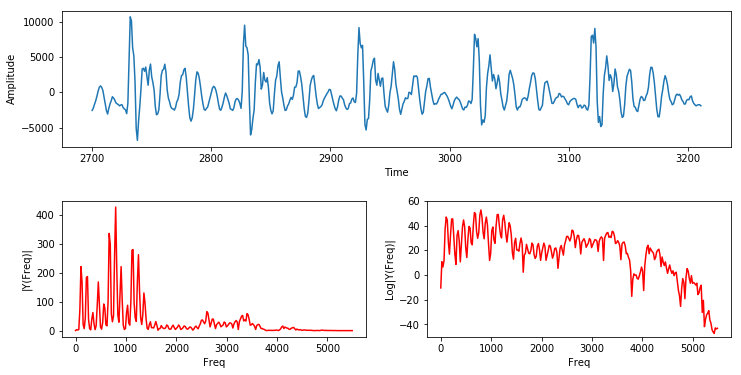

In [12]:
fig = plt.figure(figsize=(12,6))
gs = plt.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[1:, -1])

ax1.plot(x, interval_copy)
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

ax2.plot(frq,Xw[0:int(N/2)],'r') # plotting the spectrum
ax2.set_xlabel('Freq')
ax2.set_ylabel('|Y(Freq)|')

ax3.plot(frq,Xwlog[0:int(N/2)],'r') # plotting the log spectrum
ax3.set_xlabel('Freq')
ax3.set_ylabel('Log|Y(Freq)|')
ax3.set_ylim([-50,60])
plt.subplots_adjust(wspace=0.2, hspace=0.4)

### 3. Вычисление кратковременного спектра сигнала в скользящем интервале анализа

Разобъем сигнал на последовательность интервалов анализа длинной N отсчетов, вычислим спектр в каждом интервале анализа и отобразим в виде пар графиков

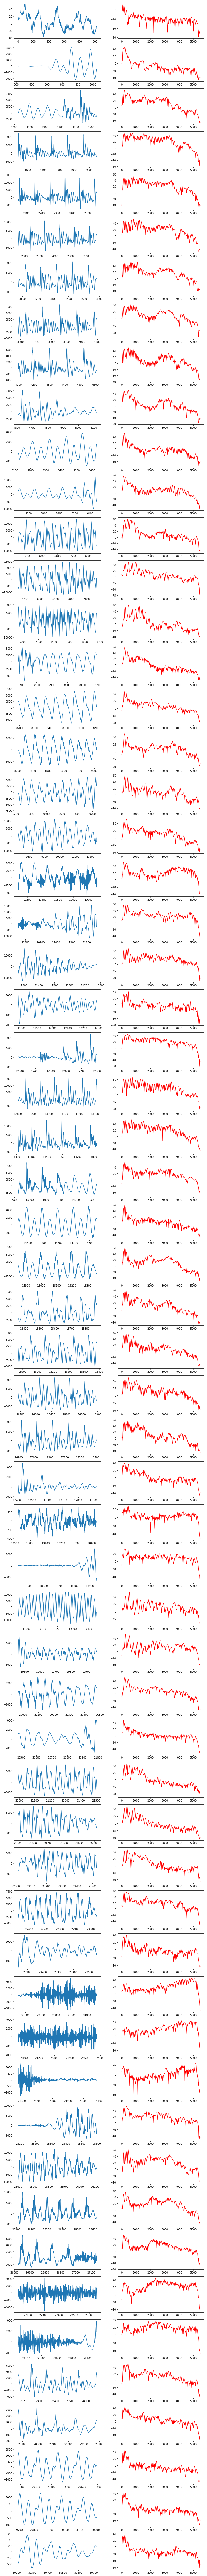

In [13]:
N=512 #Размер БПФ

win=np.hanning(N) # Сгенерируем временное окно 

K=int(nframes/N) #Количество интервалов анализа
ninterval=np.arange(0,K) #номера интервалов анализа

k = np.arange(N)
T = float(N)/framerate
frq = k/T # Полный диапазон (период) спектра
frq = frq[0:int(N/2)] #Основная полоса частот (по Котельникову)

f, ax = plt.subplots(K, 2,figsize=(13, 3*K))
for b in ninterval[0:K]:
    x=np.arange(b*N,b*N+N)    #Номера отсчетов сигнала в текущем интервале анализа
    y=win*samples[b*N:b*N+N] #Взвешанная копия интервала анализа
    
    Y=abs(fft(y)/N)   #Вычисление БПФ и нормализация
    Y1=20*np.log10(Y)
    ax[b,0].plot(x, samples[b*N:b*N+N])
    ax[b,1].plot(frq, Y1[0:int(N/2)],'r')
